In [1]:
from pnc_spks import *
%matplotlib inline

## Read and unpack the sync channel

The sync inputs are the last channel in the binary files (both in AP and LP).

### Unpack the sync channel to independent "digital" channels

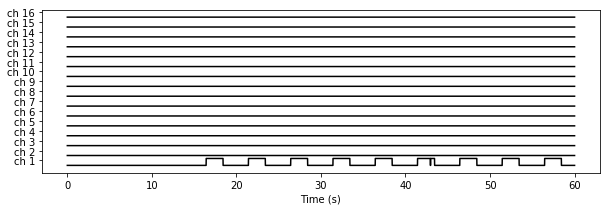

In [5]:
# load data
filename = '/home/joao/data/ephys/raw/GetThatSpike_sync_g1/sorted1/GetThatSpike_sync_g1_t0.imec0.lf.bin'
dat,meta = load_spikeglx_binary(filename)
srate = meta['imSampRate']
# unpack to binary
binsync = unpack_npix_sync(dat[:,-1],srate, output_binary=True);
nsyncchannels = binsync.shape[1]
# plot all sync channels
plt.figure(figsize = [10,3])
time = np.arange(binsync.shape[0])/srate
plt.plot(time[time < 60], binsync[time<60,:]*0.7 + np.arange(nsyncchannels),color = 'k')
plt.yticks(np.arange(nsyncchannels)+0.5,['ch {0}'.format(i+1) for i in np.arange(nsyncchannels)]);
plt.xlabel('Time (s)');

### Extract events


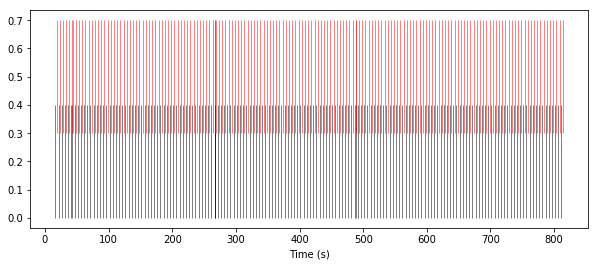

In [7]:
# unpack into events (onsets/offsets)
onsets,offsets = unpack_npix_sync(dat[:,-1],srate);

plt.figure(figsize = [10,4])
for ichan,times in onsets.items(): # onsets
    plt.vlines(times,ichan,ichan+.4,linewidth = 0.5)
    
for ichan,times in offsets.items(): # offsets
    plt.vlines(times,ichan+.3,ichan+.7,color = 'r',linewidth = 0.5)
plt.xlabel('Time (s)');

### Handle events out of place - example from a miss-used photodiode

The photodiode was getting light from other sources so we have events that did not correspond to the stimulus duration (2 seconds), heres one way of handling it for a recording done at the course. Basically: removes events shorter than expected.

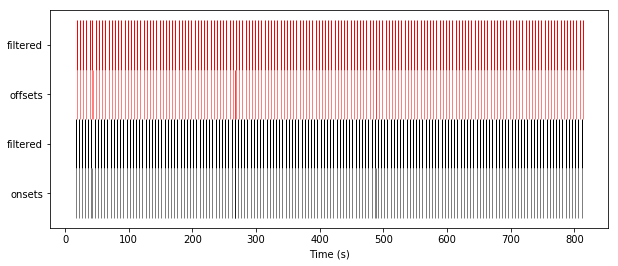

In [8]:
# plot extracted events
plt.figure(figsize = [10,4])
for ichan,times in onsets.items():
    plt.vlines(times,ichan,ichan+.1,linewidth = 0.5)
for ichan,times in offsets.items():
    plt.vlines(times,ichan+.2,ichan+.3,color = 'r',linewidth = 0.5)

# get filtered events (overwrites...)
event_on_off = np.vstack([onsets[0],offsets[0]])
onsets[0] = onsets[0][np.where(np.diff(event_on_off,axis = 0).T> 1)[0]]
offsets[0] = offsets[0][np.where(np.diff(event_on_off,axis = 0).T> 1)[0]]

# Plot the filtered events
for ichan,times in onsets.items():
    plt.vlines(times,ichan+.1,ichan+.2,linewidth = 1,color = 'k')
for ichan,times in offsets.items():
    plt.vlines(times,ichan+.3,ichan+.4,color = 'r',linewidth = 1)
plt.yticks([.05,.15,.25,.35],['onsets','filtered','offsets','filtered'])
# Save the event times to a cvs file (this can be used by jrclust)
with open(filename.replace('.lf.bin','.events.csv'),'w') as fd:
    fd.write(','.join([str(o) for o in onsets[0]]))
plt.xlabel('Time (s)');